In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np


In [11]:
carprice_df =pd.read_csv(r"C:\Users\dnsim\OneDrive\Documents\CarPrice.csv")


In [12]:
carprice_df.shape

(205, 26)

In [13]:
carprice_df.head

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [14]:
train_df = carprice_df.sample(frac=0.7,random_state=99)
test_df=carprice_df.drop(train_df.index)

In [15]:
train_df.shape

(144, 26)

In [16]:
test_df.shape

(61, 26)

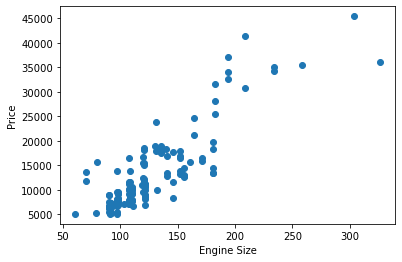

In [18]:
plot.scatter(train_df.enginesize, train_df.price)
plot.xlabel('Engine Size')
plot.ylabel('Price')
plot.show()


In [27]:
y_train = train_df.price
x_train = stats.add_constant(train_df['enginesize'])


In [28]:
model_train = stats.OLS(y_train, x_train)
results_train =model_train.fit()


In [29]:
print(results_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     431.6
Date:                Mon, 15 May 2023   Prob (F-statistic):           6.87e-45
Time:                        22:52:21   Log-Likelihood:                -1399.1
No. Observations:                 144   AIC:                             2802.
Df Residuals:                     142   BIC:                             2808.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7969.4448   1068.536     -7.458      0.0

In [31]:
intercept_train = results_train.params[0]
experience_coeff = results_train.params[1]
ssr_train = results_train.ssr

print('the intercept value is',intercept_train )
print('The coefficient(slope) is', experience_coeff)
print('The sum of square residuals is:', ssr_train)


the intercept value is -7969.444844072859
The coefficient(slope) is 167.59997925785822
The sum of square residuals is: 2319259109.3187456


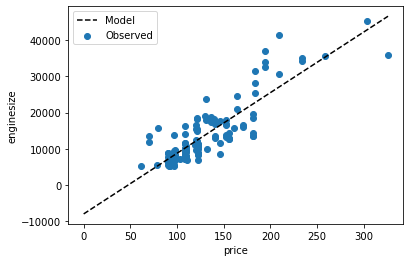

In [41]:
#observations

plot.scatter(train_df.enginesize, train_df.price, label ='Observed')
# Line of best fit
x_synthetic = np.linspace(0,train_df.enginesize.max(),50)
y_pred_carprice =x_synthetic * experience_coeff +intercept_carprice
plot.plot(x_synthetic, y_pred_carprice, color = 'k', ls='--', label ='Model')

#plot the chart
plot.xlabel('price')
plot.ylabel('enginesize')
plot.legend()
plot.show()


In [45]:

y_test = test_df.price
x_test = stats.add_constant(test_df['enginesize'])


In [46]:
test_pred = results_carprice.predict(x_test)

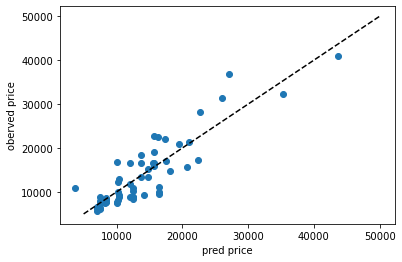

In [48]:
plot.scatter(test_pred,y_test)
plot.plot([5000,50000],[5000,50000], c='k', ls='--')
plot.xlabel('pred price')
plot.ylabel('oberved price')
plot.show()